In [1]:
import numpy as np 
import pandas as pd 
import itertools
import fnmatch
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from glob import glob
from skimage import io
from os import listdir
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
imagePatches = glob('./breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1251_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1301_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1351_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1501_class0.png
./breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1551_class0.png


In [3]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)

In [4]:
def augment1(img):
    img = cv.imread(img)
    img = cv.resize(img, (50,50))
    aug_image = np.fliplr(img)
    return aug_image

def augment2(img):
    img = cv.imread(img)
    img = cv.resize(img, (50,50))
    aug_image = np.flipud(img)
    return aug_image

def noisy(img):
    image = cv.imread(img)
    noisy = np.random.poisson(image / 255.0*300) / 300 * 255
    noisy = cv.resize(noisy, (50,50))
    noisy = noisy.astype(np.uint8)
    return noisy


In [5]:
image_name = './breast-histopathology-images/10253/0/10253_idx5_x1001_y1001_class0.png'

In [6]:
def read_img(img):
    img = cv.imread(img)
    img = cv.resize(img, (50,50))
    return img

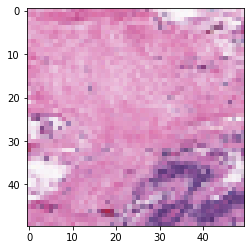

In [7]:
image = cv.imread(image_name)
image = cv.resize(image, (50,50))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

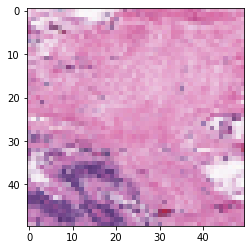

In [8]:
image = augment1(image_name)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

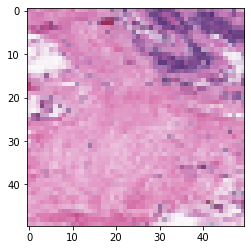

In [9]:
image = augment2(image_name)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

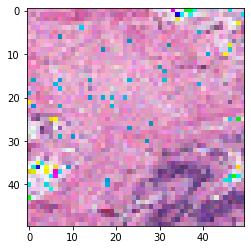

In [10]:
image = noisy(image_name)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))